In [1]:
from PIL import Image
from transformers import DetrImageProcessor
from transformers import TableTransformerForObjectDetection
from transformers import DetrFeatureExtractor

import torch
import matplotlib.pyplot as plt
import os
import psutil
import time
import pandas as pd
import pytesseract

/Users/bhairavjain/Desktop/building_object_detection_module/venv_pdf_object/lib/python3.11/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
feature_extractor = DetrFeatureExtractor()

model = TableTransformerForObjectDetection.from_pretrained("microsoft/table-transformer-detection")

/Users/bhairavjain/Desktop/building_object_detection_module/venv_pdf_object/lib/python3.11/site-packages/transformers/models/detr/feature_extraction_detr.py:38: FutureWarning: The class DetrFeatureExtractor is deprecated and will be removed in version 5 of Transformers. Please use DetrImageProcessor instead.
  warnings.warn(
Some weights of the model checkpoint at microsoft/table-transformer-detection were not used when initializing TableTransformerForObjectDetection: ['model.backbone.conv_encoder.model.layer2.0.downsample.1.num_batches_tracked', 'model.backbone.conv_encoder.model.layer3.0.downsample.1.num_batches_tracked', 'model.backbone.conv_encoder.model.layer4.0.downsample.1.num_batches_tracked']
- This IS expected if you are initializing TableTransformerForObjectDetection from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are in

In [22]:
COLORS = [[0.000, 0.447, 0.741], [0.850, 0.325, 0.098], [0.929, 0.694, 0.125],
          [0.494, 0.184, 0.556], [0.466, 0.674, 0.188], [0.301, 0.745, 0.933]]

def plot_results(pil_img, scores, labels, boxes):
    plt.figure(figsize=(16,10))
    plt.imshow(pil_img)
    ax = plt.gca()
    colors = COLORS * 100
    for score, label, (xmin, ymin, xmax, ymax),c  in zip(scores.tolist(), labels.tolist(), boxes.tolist(), colors):
        ax.add_patch(plt.Rectangle((xmin, ymin), xmax - xmin, ymax - ymin,
                                   fill=False, color=c, linewidth=3))
        text = f'{model.config.id2label[label]}: {score:0.2f}'
        ax.text(xmin, ymin, text, fontsize=15,
                bbox=dict(facecolor='yellow', alpha=0.5))
    plt.axis('off')
    plt.show()

In [23]:
def table_detection(file_path):
    image = Image.open(file_path).convert("RGB")
    width, height = image.size
    image.resize((int(width*0.5), int(height*0.5)))
    
    feature_extractor = DetrImageProcessor()
    encoding = feature_extractor(image, return_tensors="pt")

    with torch.no_grad():
        outputs = model(**encoding)

    width, height = image.size
    results = feature_extractor.post_process_object_detection(outputs, threshold=0.7, target_sizes=[(height, width)])[0]
    plot_results(image, results['scores'], results['labels'], results['boxes'])
    return results['boxes']

In [29]:
file_path = "/Users/bhairavjain/Desktop/building_object_detection_module/pdf_query_document/pdf_ouptut/Annual-Report-Template/predict_table_output/image1/predict_table_1.jpeg"
image = Image.open(file_path).convert("RGB")
width, height = image.size
image.resize((int(width*0.5), int(height*0.5)))

feature_extractor = DetrImageProcessor()
encoding = feature_extractor(image, return_tensors="pt")

with torch.no_grad():
    outputs = model(**encoding)

width, height = image.size
results = feature_extractor.post_process_object_detection(outputs, threshold=0.7, target_sizes=[(height, width)])[0]

In [28]:
model.config.id2label

{0: 'table',
 1: 'table column',
 2: 'table row',
 3: 'table column header',
 4: 'table projected row header',
 5: 'table spanning cell'}

In [ ]:
feature_extractor.

In [30]:
results

{'scores': tensor([0.9886, 0.8316, 0.9664, 0.8841, 0.9923, 0.9548, 0.9173, 0.8361, 0.9997]),
 'labels': tensor([2, 2, 1, 2, 1, 2, 3, 1, 0]),
 'boxes': tensor([[  29.8330,  137.5166, 1876.1636,  190.2878],
         [  30.4216,   93.0182, 1875.6854,  142.1077],
         [  32.4838,   60.4092,  286.1625,  226.5129],
         [  31.0863,   57.6166, 1877.4097,   96.4984],
         [ 737.2185,   59.3875, 1894.2440,  226.9400],
         [  29.4316,  186.0141, 1876.1853,  227.5923],
         [  29.9044,   56.2203, 1877.3214,   95.7156],
         [ 219.8180,   60.6406,  865.1758,  226.0988],
         [  31.5369,   59.4931, 1877.4823,  227.2653]])}

In [3]:
count = 0
# root = "/Users/bhairavjain/Desktop/building_object_detection_module/pdf_query_document/pdf_ouptut/Annual-Report-Template/images"
# root = "/Users/bhairavjain/Desktop/building_object_detection_module/pdf_query_document/pdf_ouptut/Annual-Report-Template/predict_table_output/image0"
root = "/Users/bhairavjain/Desktop/building_object_detection_module/pdf_query_document/pdf_ouptut/Annual_Report___2022_23__2__bWICfx_87/predict_table_output/image0"
for file in os.listdir(root):
    file_path = os.path.join(root, file)
    start_time = time.time()
    
    pred_bbox = table_detection(file_path)
    
    
    count += 1
    
    end_time = time.time()
    time_usage = end_time - start_time
    ram_usage = psutil.Process(os.getpid()).memory_info().rss / 1024 / 1024
    
    print(f"Iteration {count + 1} - RAM Usage: {ram_usage:.2f} MB, Time Usage: {time_usage:.2f} seconds")

    if count > 2:
        break

NameError: name 'table_detection' is not defined

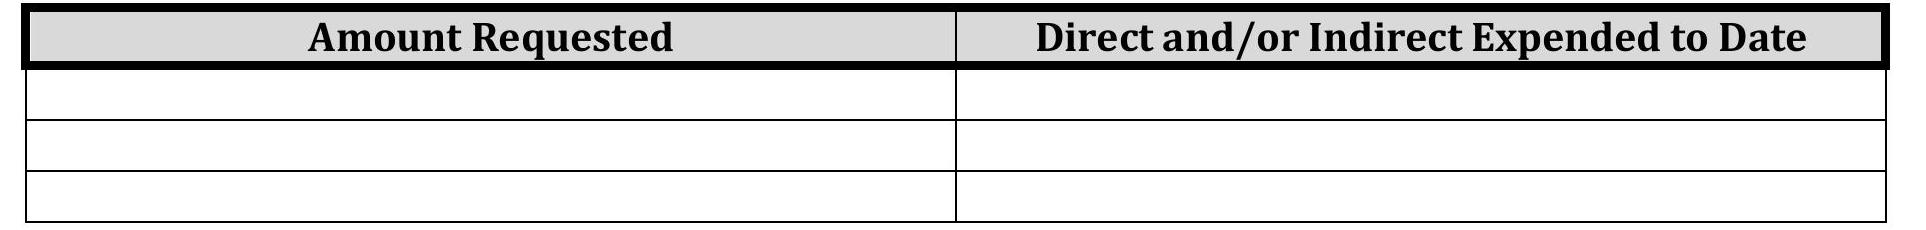

In [4]:
file = '/Users/bhairavjain/Desktop/building_object_detection_module/pdf_query_document/pdf_ouptut/Annual-Report-Template/predict_table_output/image0/predict_table_1.jpeg'
image = Image.open(file).convert("RGB")
image

In [4]:
from huggingface_hub import hf_hub_download
from PIL import Image

In [5]:
from transformers import TableTransformerForObjectDetection

model = TableTransformerForObjectDetection.from_pretrained("microsoft/table-transformer-structure-recognition")

Some weights of the model checkpoint at microsoft/table-transformer-structure-recognition were not used when initializing TableTransformerForObjectDetection: ['model.backbone.conv_encoder.model.layer2.0.downsample.1.num_batches_tracked', 'model.backbone.conv_encoder.model.layer3.0.downsample.1.num_batches_tracked', 'model.backbone.conv_encoder.model.layer4.0.downsample.1.num_batches_tracked']
- This IS expected if you are initializing TableTransformerForObjectDetection from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TableTransformerForObjectDetection from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


In [6]:
COLORS = [[0.000, 0.447, 0.741], [0.850, 0.325, 0.098], [0.929, 0.694, 0.125],
          [0.494, 0.184, 0.556], [0.466, 0.674, 0.188], [0.301, 0.745, 0.933]]

def plot_results(pil_img, scores, labels, boxes):
    plt.figure(figsize=(16,10))
    plt.imshow(pil_img)
    ax = plt.gca()
    colors = COLORS * 100
    for score, label, (xmin, ymin, xmax, ymax),c  in zip(scores.tolist(), labels.tolist(), boxes.tolist(), colors):
        ax.add_patch(plt.Rectangle((xmin, ymin), xmax - xmin, ymax - ymin,
                                   fill=False, color=c, linewidth=3))
        text = f'{model.config.id2label[label]}: {score:0.2f}'
        ax.text(xmin, ymin, text, fontsize=15,
                bbox=dict(facecolor='yellow', alpha=0.5))
    plt.axis('off')
    plt.show()


def cell_detection(file_path):

    image = Image.open(file_path).convert("RGB")
    width, height = image.size
    image.resize((int(width*0.5), int(height*0.5)))


    encoding = feature_extractor(image, return_tensors="pt")
    encoding.keys()

    with torch.no_grad():
      outputs = model(**encoding)


    target_sizes = [image.size[::-1]]
    results = feature_extractor.post_process_object_detection(outputs, threshold=0.6, target_sizes=target_sizes)[0]
    plot_results(image, results['scores'], results['labels'], results['boxes'])
    model.config.id2label

In [7]:
def table_detection(file_path):
    image = Image.open(file_path).convert("RGB")
    width, height = image.size
    image.resize((int(width*0.5), int(height*0.5)))
    
    feature_extractor = DetrImageProcessor()
    encoding = feature_extractor(image, return_tensors="pt")

    with torch.no_grad():
        outputs = model(**encoding)

    width, height = image.size
    results = feature_extractor.post_process_object_detection(outputs, threshold=0.7, target_sizes=[(height, width)])[0]
    plot_results(image, results['scores'], results['labels'], results['boxes'])
    return results['boxes']

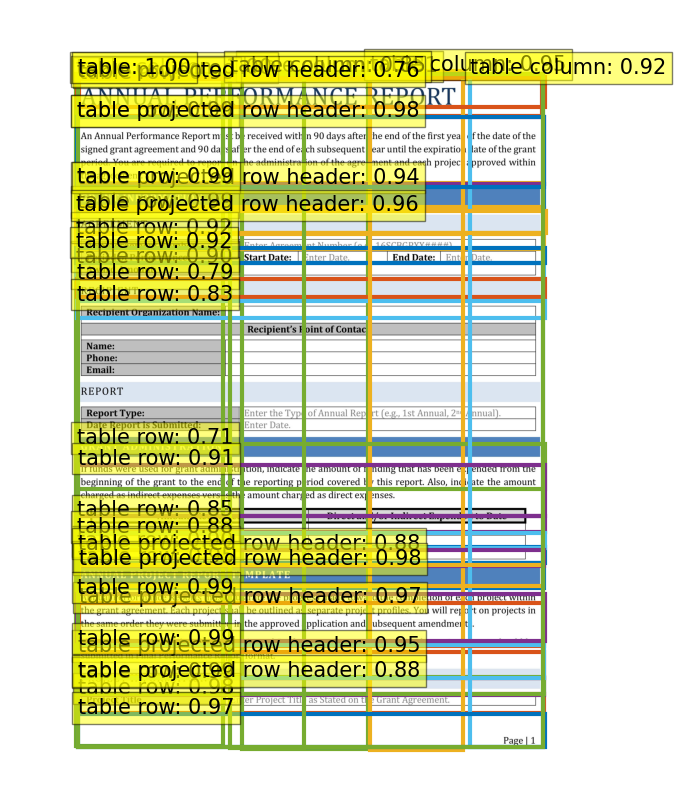

Iteration 2 - RAM Usage: 635.33 MB, Time Usage: 1.06 seconds


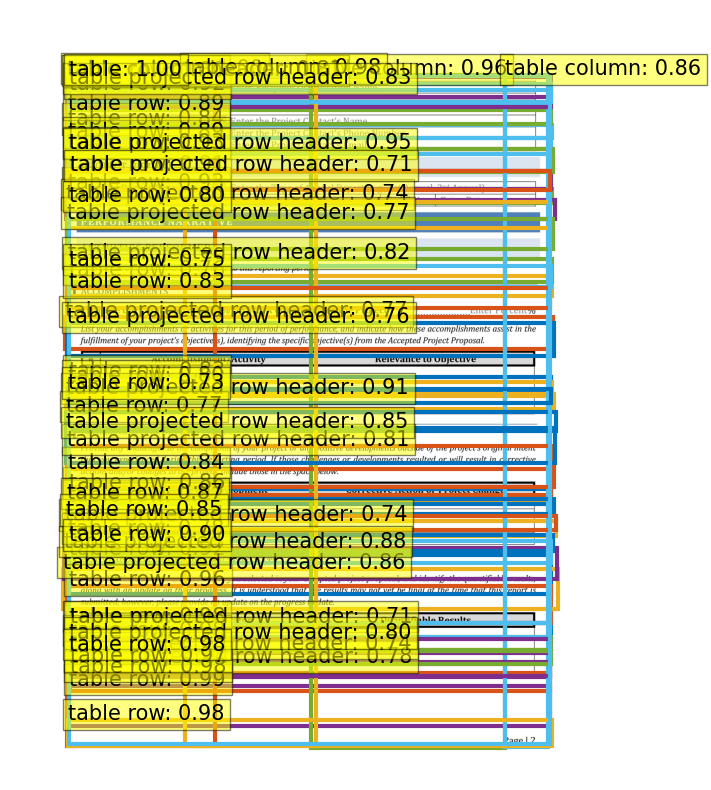

Iteration 3 - RAM Usage: 704.03 MB, Time Usage: 0.92 seconds


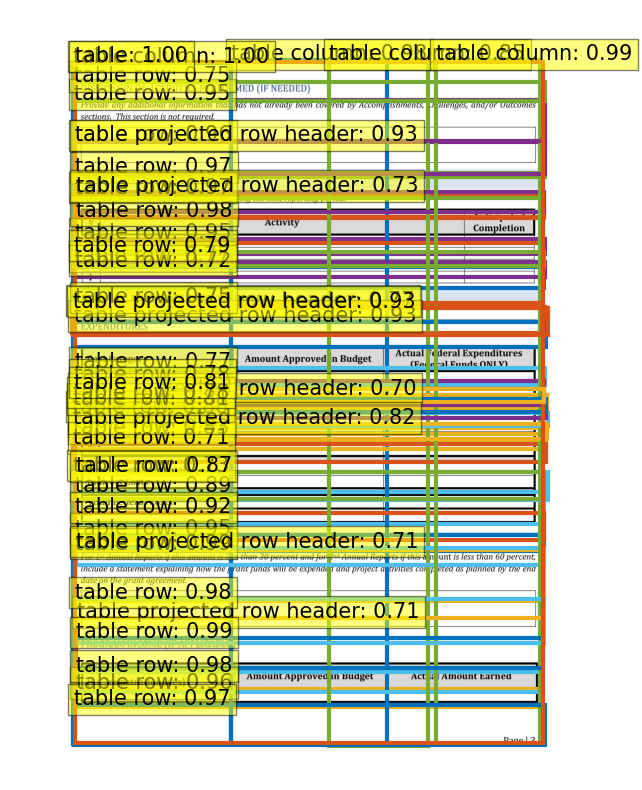

Iteration 4 - RAM Usage: 756.94 MB, Time Usage: 0.92 seconds


In [21]:
count = 0
root = "/Users/bhairavjain/Desktop/building_object_detection_module/pdf_query_document/pdf_ouptut/Annual-Report-Template/images"
root = "/Users/bhairavjain/Desktop/building_object_detection_module/pdf_query_document/pdf_ouptut/Annual_Report___2022_23__2__bWICfx_87/predict_table_output/image0"

for file in os.listdir(root):
    file_path = os.path.join(root, file)
    start_time = time.time()
    
    pred_bbox = table_detection(file_path)
    
    
    count += 1
    
    end_time = time.time()
    time_usage = end_time - start_time
    ram_usage = psutil.Process(os.getpid()).memory_info().rss / 1024 / 1024
    
    print(f"Iteration {count + 1} - RAM Usage: {ram_usage:.2f} MB, Time Usage: {time_usage:.2f} seconds")

    if count > 2:
        break

In [8]:
ram_usage = psutil.Process(os.getpid()).memory_info().rss / 1024 / 1024

print(f"ram usage : {ram_usage}")

ram usage : 107.4375


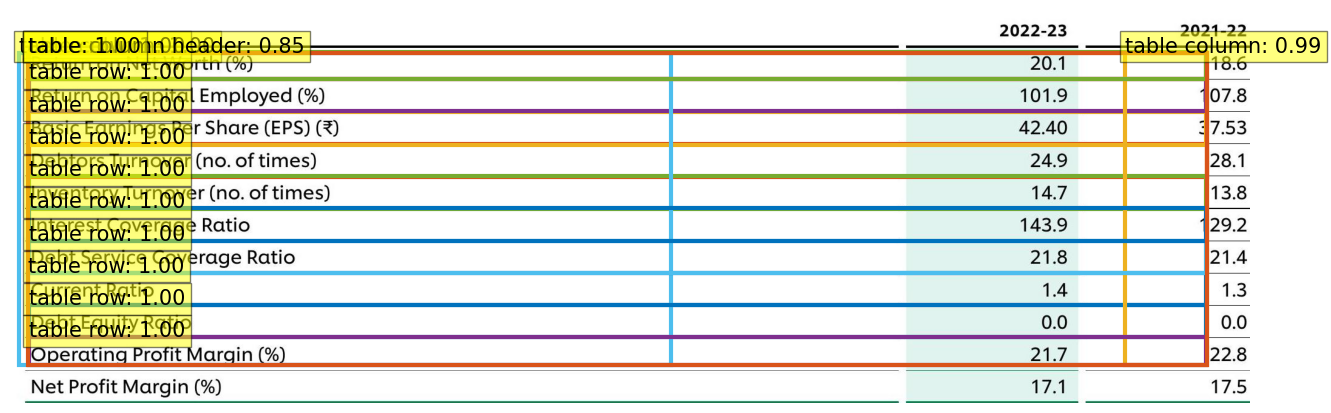

Iteration 2 - RAM Usage: 490.91 MB, Time Usage: 0.85 seconds


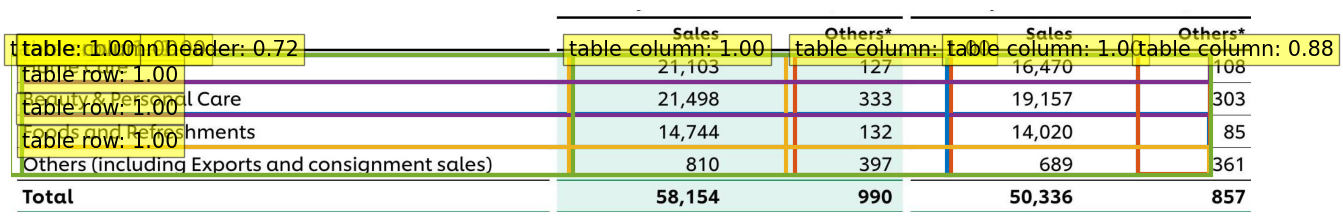

Iteration 3 - RAM Usage: 566.34 MB, Time Usage: 0.27 seconds


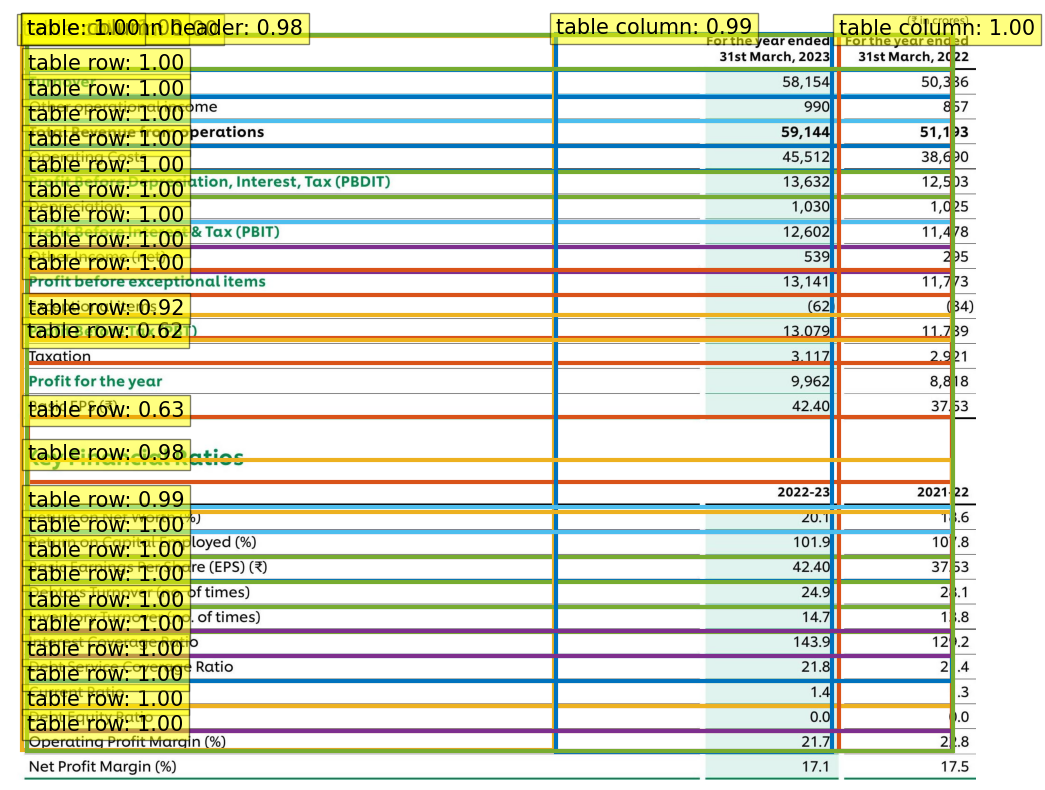

Iteration 4 - RAM Usage: 762.12 MB, Time Usage: 0.73 seconds


In [9]:
count = 0
# root = "/kaggle/input/pubtables-subset-100k/subset/img_test"
# root = "/Users/bhairavjain/Desktop/building_object_detection_module/pdf_query_document/pdf_ouptut/Annual-Report-Template/predict_table_output/image1"
root = "/Users/bhairavjain/Desktop/building_object_detection_module/pdf_query_document/pdf_ouptut/Annual_Report___2022_23__2__bWICfx_87/predict_table_output/image0"
for file in os.listdir(root):
    file_path= os.path.join(root, file)
    start_time = time.time()
    
    cell_detection(file_path)
    count+=1
    
    end_time = time.time()
    time_usage = end_time - start_time
    ram_usage = psutil.Process(os.getpid()).memory_info().rss / 1024 / 1024
    
    print(f"Iteration {count + 1} - RAM Usage: {ram_usage:.2f} MB, Time Usage: {time_usage:.2f} seconds")
    
    if(count>2):
        break

In [12]:
def plot_results_specific(pil_img, scores, labels, boxes,lab):
    plt.figure(figsize=(16, 10))
    plt.imshow(pil_img)
    ax = plt.gca()
    colors = COLORS * 100
    for score, label, (xmin, ymin, xmax, ymax), c in zip(scores.tolist(), labels.tolist(), boxes.tolist(), colors):
        if label == lab:
            ax.add_patch(plt.Rectangle((xmin, ymin), xmax - xmin, ymax - ymin,
                                       fill=False, color=c, linewidth=3))
            text = f'{model.config.id2label[label]}: {score:0.2f}'
            ax.text(xmin, ymin, text, fontsize=15,
                    bbox=dict(facecolor='yellow', alpha=0.5))
    plt.axis('off')
    plt.show()

In [13]:
def draw_box_specific(image_path,labelnum):
    image = Image.open(image_path).convert("RGB")
    width, height = image.size

    encoding = feature_extractor(image, return_tensors="pt")

    with torch.no_grad():
        outputs = model(**encoding)

    results = feature_extractor.post_process_object_detection(outputs, threshold=0.7, target_sizes=[(height, width)])[0]
    plot_results_specific(image, results['scores'], results['labels'], results['boxes'],labelnum)

In [14]:
def compute_boxes(image_path):
    image = Image.open(image_path).convert("RGB")
    width, height = image.size

    encoding = feature_extractor(image, return_tensors="pt")

    with torch.no_grad():
        outputs = model(**encoding)

    results = feature_extractor.post_process_object_detection(outputs, threshold=0.7, target_sizes=[(height, width)])[0]
    boxes = results['boxes'].tolist()
    labels = results['labels'].tolist()

    return boxes,labels

In [15]:
def extract_table(image_path):
    image = Image.open(image_path).convert("RGB")
    boxes,labels = compute_boxes(image_path)
    
    cell_locations = []

    for box_row, label_row in zip(boxes, labels):
        if label_row == 2:
            for box_col, label_col in zip(boxes, labels):
                if label_col == 1:
                    cell_box = (box_col[0], box_row[1], box_col[2], box_row[3])
                    cell_locations.append(cell_box)

    cell_locations.sort(key=lambda x: (x[1], x[0]))
    
    num_columns = 0
    box_old = cell_locations[0]

    for box in cell_locations[1:]:
        x1, y1, x2, y2 = box
        x1_old, y1_old, x2_old, y2_old = box_old
        num_columns += 1
        if y1 > y1_old:
            break
        
        box_old = box
        
    headers = []
    for box in cell_locations[:num_columns]:
        x1, y1, x2, y2 = box
        cell_image = image.crop((x1, y1, x2, y2)) 
        new_width = cell_image.width * 4
        new_height = cell_image.height * 4
        cell_image = cell_image.resize((new_width, new_height), resample=Image.LANCZOS)
        cell_text = pytesseract.image_to_string(cell_image)
        headers.append(cell_text.rstrip()) 

    df = pd.DataFrame(columns=headers)

    row = []
    for box in cell_locations[num_columns:]:
        x1, y1, x2, y2 = box
        cell_image = image.crop((x1, y1, x2, y2)) 
        new_width = cell_image.width * 4
        new_height = cell_image.height * 4
        cell_image = cell_image.resize((new_width, new_height), resample=Image.LANCZOS)
        cell_text = pytesseract.image_to_string(cell_image)

        if len(cell_text) > num_columns:
            cell_text = cell_text[:num_columns]

        row.append(cell_text.rstrip())

        if len(row) == num_columns:
            df.loc[len(df)] = row
            row = []
            
    return df

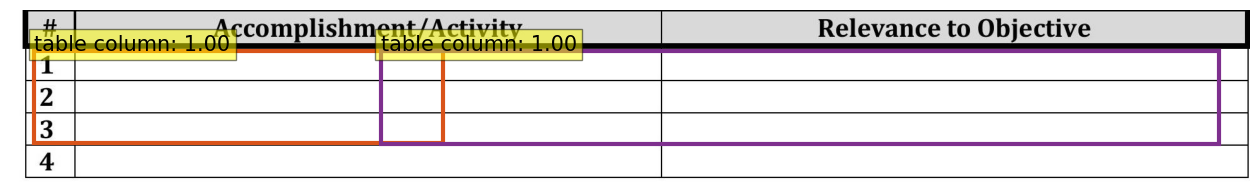

In [18]:
image_path = '/Users/bhairavjain/Desktop/building_object_detection_module/pdf_query_document/pdf_ouptut/Annual-Report-Template/predict_table_output/image1/predict_table_2.jpeg'
draw_box_specific(image_path,1)
df = extract_table(image_path)
df.to_csv('data.csv', index=False)

2024-08-19 19:14:35,396 - Extractor - INFO - [ConvertUsingPDF2image] - Saving image to: /var/folders/zj/qwsh86n90739fm55lzpz3xcr0000gp/T/tmpuf2kvdip/Annual_Report___2022_23__2__bWICfx_87_page_1.jpg


Poppler is already installed.


Could not find image processor class in the image processor config or the model config. Loading based on pattern matching with the model's feature extractor configuration.
Some weights of the model checkpoint at microsoft/table-transformer-detection were not used when initializing TableTransformerForObjectDetection: ['model.backbone.conv_encoder.model.layer2.0.downsample.1.num_batches_tracked', 'model.backbone.conv_encoder.model.layer3.0.downsample.1.num_batches_tracked', 'model.backbone.conv_encoder.model.layer4.0.downsample.1.num_batches_tracked']
- This IS expected if you are initializing TableTransformerForObjectDetection from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TableTransformerForObjectDetection from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassif

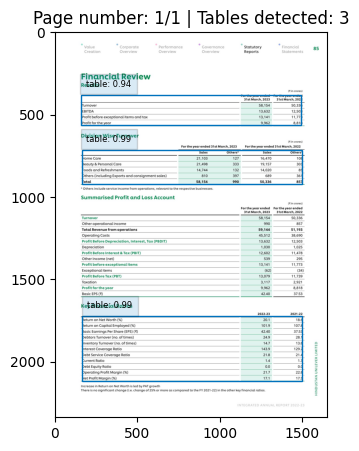

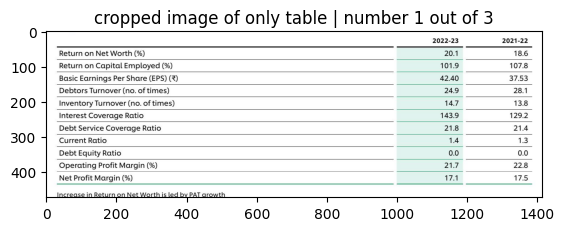

2024-08-19 19:14:37,827 - Extractor - INFO - [TableDetectorTATR] - Saved image to: /var/folders/zj/qwsh86n90739fm55lzpz3xcr0000gp/T/tmpuf2kvdip\Annual_Report___2022_23__2__bWICfx_87_table_1.jpg


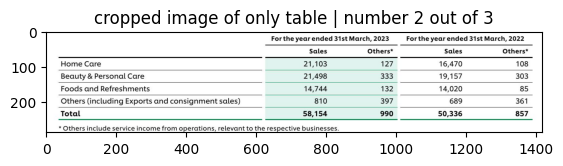

2024-08-19 19:14:37,882 - Extractor - INFO - [TableDetectorTATR] - Saved image to: /var/folders/zj/qwsh86n90739fm55lzpz3xcr0000gp/T/tmpuf2kvdip\Annual_Report___2022_23__2__bWICfx_87_table_1.jpg


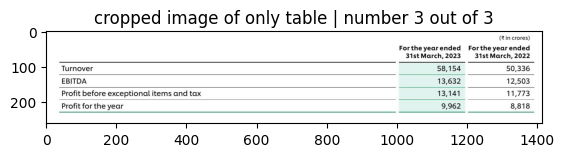

2024-08-19 19:14:37,934 - Extractor - INFO - [TableDetectorTATR] - Saved image to: /var/folders/zj/qwsh86n90739fm55lzpz3xcr0000gp/T/tmpuf2kvdip\Annual_Report___2022_23__2__bWICfx_87_table_1.jpg
/Users/bhairavjain/Desktop/building_object_detection_module/venv_pdf_object/lib/python3.11/site-packages/transformers/models/detr/feature_extraction_detr.py:38: FutureWarning: The class DetrFeatureExtractor is deprecated and will be removed in version 5 of Transformers. Please use DetrImageProcessor instead.
  warnings.warn(
Some weights of the model checkpoint at microsoft/table-transformer-structure-recognition were not used when initializing TableTransformerForObjectDetection: ['model.backbone.conv_encoder.model.layer2.0.downsample.1.num_batches_tracked', 'model.backbone.conv_encoder.model.layer3.0.downsample.1.num_batches_tracked', 'model.backbone.conv_encoder.model.layer4.0.downsample.1.num_batches_tracked']
- This IS expected if you are initializing TableTransformerForObjectDetection from 

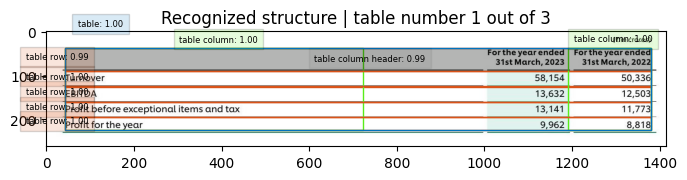

Some weights of the model checkpoint at microsoft/table-transformer-structure-recognition were not used when initializing TableTransformerForObjectDetection: ['model.backbone.conv_encoder.model.layer2.0.downsample.1.num_batches_tracked', 'model.backbone.conv_encoder.model.layer3.0.downsample.1.num_batches_tracked', 'model.backbone.conv_encoder.model.layer4.0.downsample.1.num_batches_tracked']
- This IS expected if you are initializing TableTransformerForObjectDetection from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TableTransformerForObjectDetection from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
2024-08-19 19:14:39,956 - Extractor - INFO - [StructureRecognitionTATR] - Table correction: [tensor(2

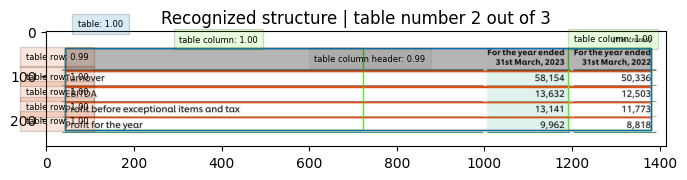

Some weights of the model checkpoint at microsoft/table-transformer-structure-recognition were not used when initializing TableTransformerForObjectDetection: ['model.backbone.conv_encoder.model.layer2.0.downsample.1.num_batches_tracked', 'model.backbone.conv_encoder.model.layer3.0.downsample.1.num_batches_tracked', 'model.backbone.conv_encoder.model.layer4.0.downsample.1.num_batches_tracked']
- This IS expected if you are initializing TableTransformerForObjectDetection from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TableTransformerForObjectDetection from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
2024-08-19 19:14:41,026 - Extractor - INFO - [StructureRecognitionTATR] - Table correction: [tensor(2

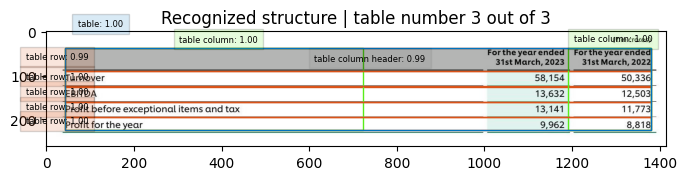

2024-08-19 19:14:41,111 - Extractor - INFO - [PyPDF2Textport] - ✔ Full XML including text saved to: /Users/bhairavjain/Desktop/building_object_detection_module/pdf_query_document//table_1
2024-08-19 19:14:41,112 - Extractor - INFO - [PyPDF2Textport] - ✔ Full XML including text saved to: /Users/bhairavjain/Desktop/building_object_detection_module/pdf_query_document//table_2
2024-08-19 19:14:41,114 - Extractor - INFO - [PyPDF2Textport] - ✔ Full XML including text saved to: /Users/bhairavjain/Desktop/building_object_detection_module/pdf_query_document//table_3
2024-08-19 19:14:41,114 - Extractor - INFO - [Extractor] - ✔ Process Finished


In [12]:
import extractable as ex

input_file = "/Users/bhairavjain/Desktop/research_paper/Annual_Report___2022_23__2__bWICfx_87.pdf"
output_dir = "/Users/bhairavjain/Desktop/building_object_detection_module/pdf_query_document/"

# Extract tables from a PDF file
ex.extract(input_file=input_file, output_dir=output_dir, mode=ex.Mode.PRESENTATION)